In [1]:
using CairoMakie, Statistics, KernelDensity

function order(X,R,step)
    c = zeros(Int(ceil(1.0/step)))
    cnt = zeros(size(c))
    y = 0.0
    n = 1
    while y <= 1.0
        for i in 1:size(X,1)
            if y <= X[i,2] <= y+step
                c[n] += R[i]
                cnt[n] += 1
            end
        end
        n += 1
        y += step
    end
    return replace(c./cnt,NaN=>0.0)
end

order (generic function with 1 method)

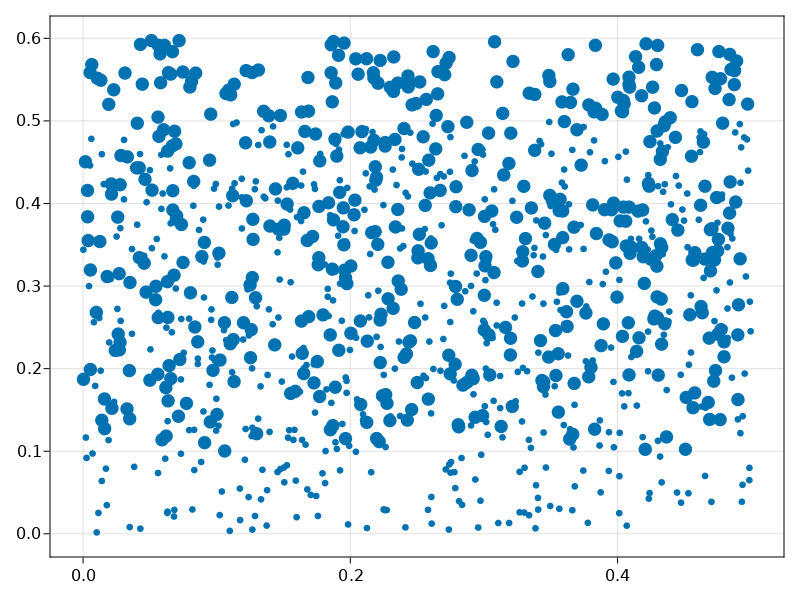

In [192]:
N = 1024

r = 0.005

R = rand((r,2*r),N);
X = zeros(N,2)
for i in 1:N
    if (R[i] == r)
        X[i,1] = rand()*0.5
        X[i,2] = rand()*0.5
    else
        X[i,1] = rand()*0.5
        X[i,2] = rand()*0.5+0.1
    end
end

#X = rand(N,2)

fig = Figure()
ax = Axis(fig[1,1])
p = [Point2f0(X[i,1],X[i,2]) for i in 1:N]
scatter!(ax,p,markersize=R,markerspace=SceneSpace)
fig

In [187]:
function kd(x,s::Vector{Float64},h)
    K = (x) -> exp(-x^2 / 2.0) / sqrt(2*Ï€)
    y = zeros(length(x))
    for (i,p) in enumerate(x)
        yp = 0.0
        for xi in s
            yp += K((p-xi)/h) 
        end
        y[i] = yp / (length(s)*h)
    end
    return y
end

kd (generic function with 2 methods)

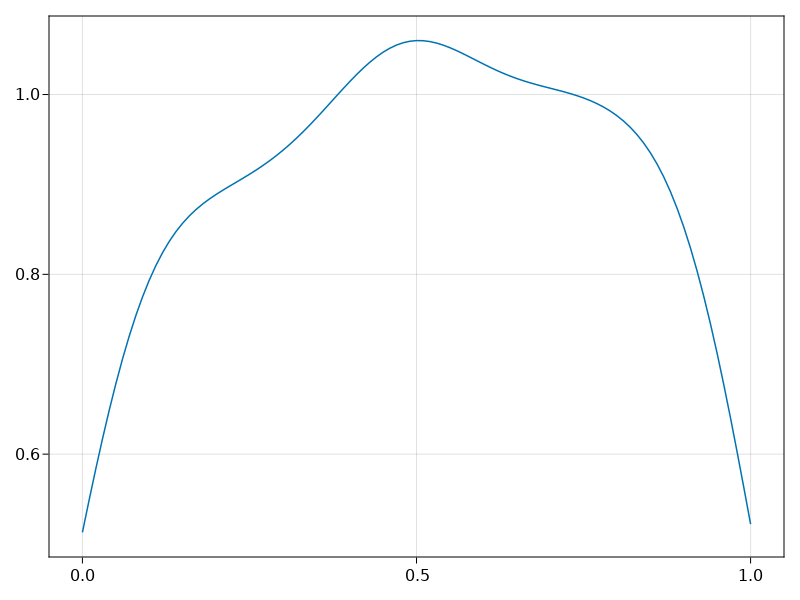

In [188]:
y=rand(1000)
k = kd(collect(0:0.01:1),y,0.1)
lines(collect(0:0.01:1),k)

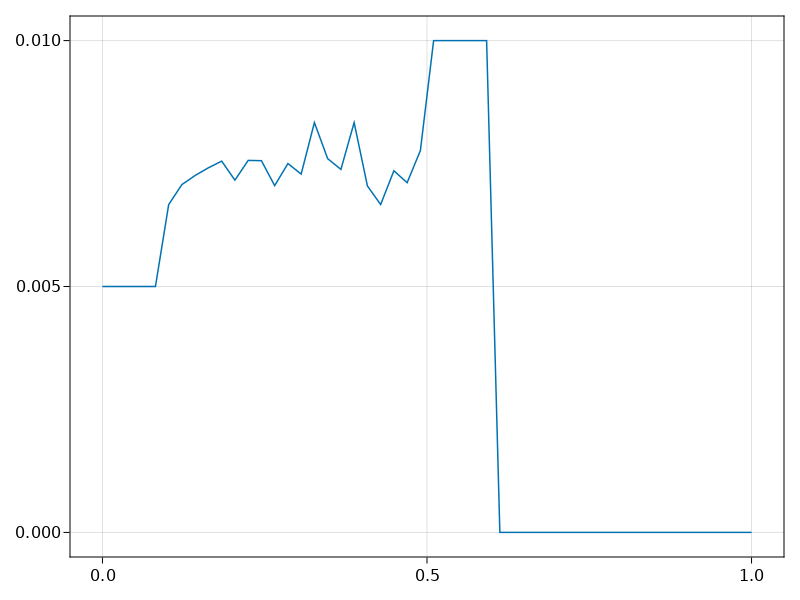

In [193]:
y = order(X,R,4*r)
lines(collect(0:(1.0/(length(y)-1)):1),y)

In [190]:
k = 3
i = 50


50

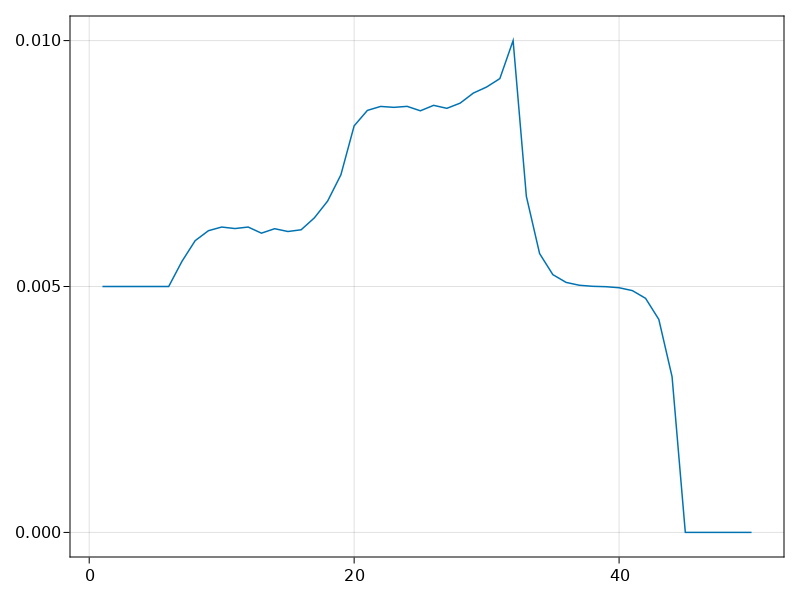

In [191]:
f = copy(y)

k = 6
for i in 1:size(f,1)
    f[i] = sum((y[max(1,i-k):min(size(f,1),i+k)] .*exp.(abs.((i.-(max(1,i-k):min(size(f,1),i+k)))))))/sum(exp.(abs.((i.-(max(1,i-k):min(size(f,1),i+k))))))
end

lines(f)

In [91]:
function order(X,R,step)
    c = zeros(Int(floor(1.0/step)))
    cnt = ones(size(c))
    y = 0.0
    n = 1
    while y < 1.0
        for i in 1:size(X,1)
            if y <= X[i,2] <= y+step
                c[n] += R[i]
                cnt[n] += 1
            end
        end
        n += 1
        y += step
    end
    return c./cnt
end

order (generic function with 2 methods)